# PML HW3 Submission Notebook

Name - Atreya Goswami<br/>
Roll No. - 190201<br/>
Date of submission - May 04, 2023<br/>

Q$5. (a)$ part

In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)

In [2]:
def normal(x, mu, sigma):
    return 1/np.sqrt(2*np.pi*sigma**2) * np.exp(-1/(2*sigma**2) * (x - mu)**2)

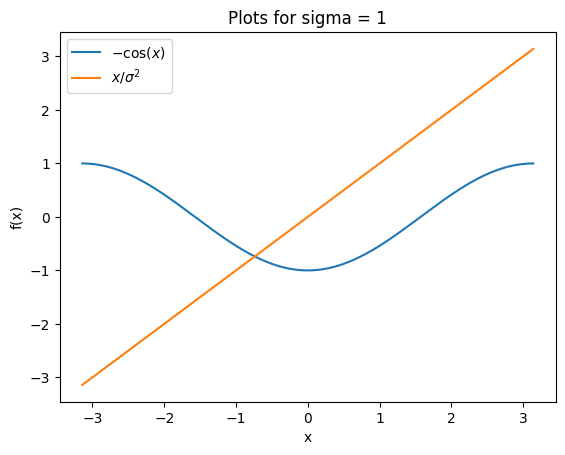

x_m = 3.141592653589793


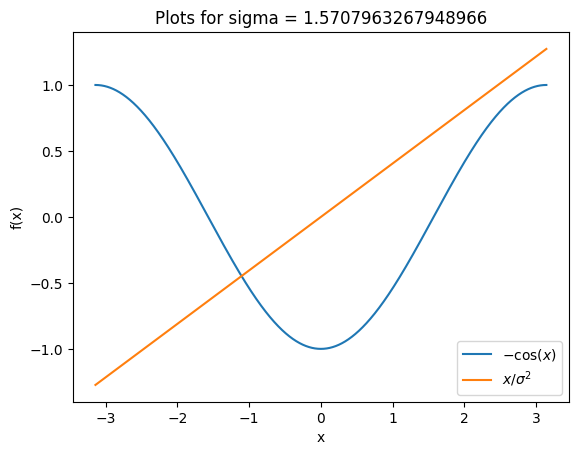

x_m = 3.141592653589793


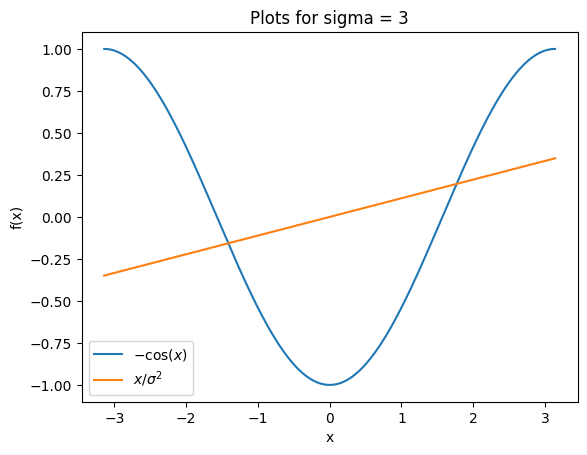

x_m = 1.768579362641959


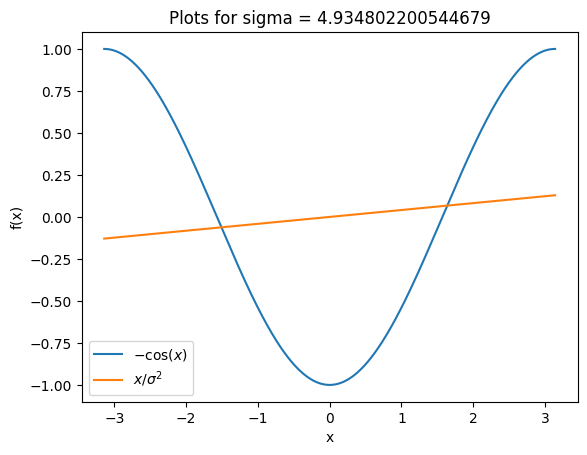

x_m = 1.6378760379201518


In [3]:
sigma_values = [1,np.pi/2,3,np.pi*np.pi/2]
x_space = np.linspace(-np.pi,np.pi,10000)
for sigma in sigma_values:
    f1 = -np.cos(x_space)
    f2 = x_space/(sigma**2)
    plt.plot(x_space, f1, label=r"$-\cos(x)$")
    plt.plot(x_space, f2, label=r"$x/\sigma^2$")
    plt.legend()
    plt.title(f"Plots for sigma = {sigma}")
    plt.xlabel(r"x")
    plt.ylabel(r"f(x)")
    plt.savefig(f'plot_sigma={np.round(100*sigma)/100}.png')
    plt.show()
    idx = np.argwhere(np.diff(np.sign(f1 - f2))).flatten()
    mod_idx = []
    for id in idx:
        res = 1/(sigma**2) - np.sin(x_space[id])
        if(res < 0):
            mod_idx.append(id)
    if(len(mod_idx) == 0):
        mod_idx.append(-1)
    print("x_m = " + str(float(x_space[mod_idx])))

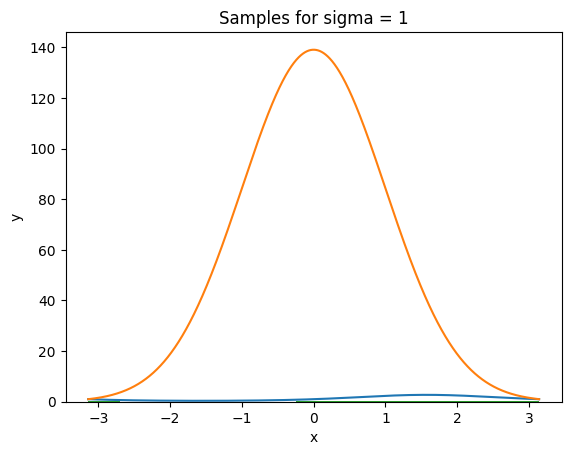

Rejection rate :  97.68316331613468


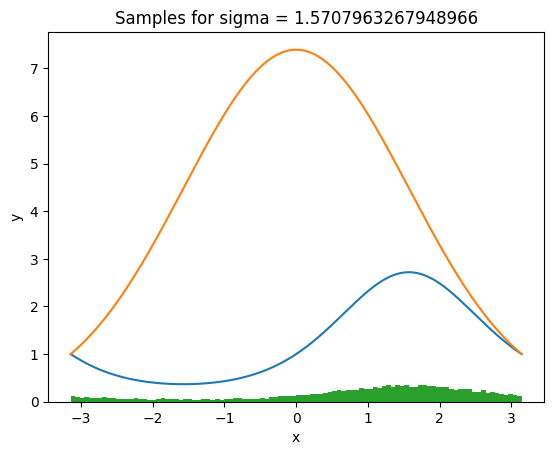

Rejection rate :  72.75130112537126


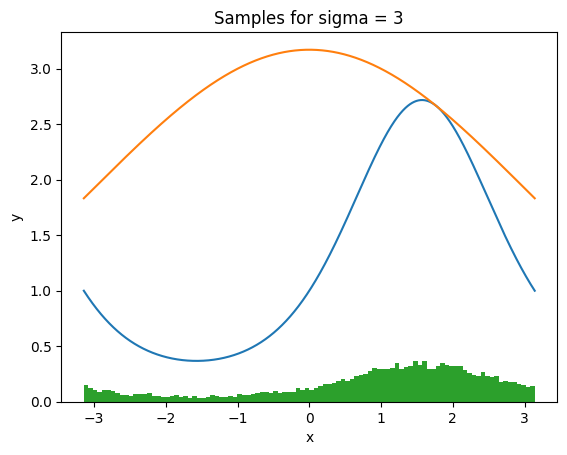

Rejection rate :  66.99125268196072


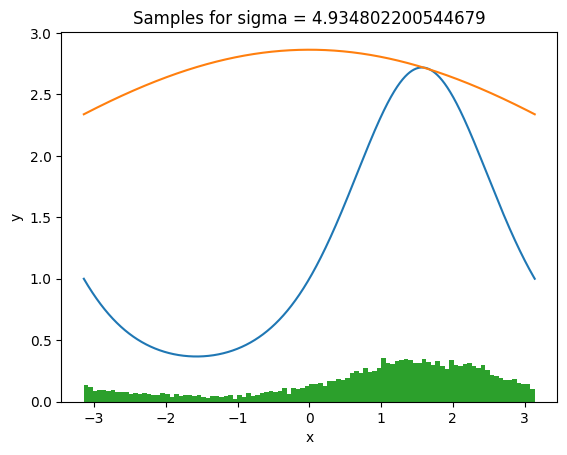

Rejection rate :  77.57596143065366


In [4]:
M_values = [348.53, 29.09, 23.85, 35.41]
sigma_values = [1,np.pi/2,3,np.pi*np.pi/2]

for i in range(4):
    samples = []
    acceptance, rejection = 0, 0
    while(len(samples) < 10000):
        z = float(np.random.normal(0,sigma_values[i],1))
        uniform = np.random.uniform(0, M_values[i]*normal(z,0,sigma_values[i]))
        if ((z >= -np.pi) and (z <= np.pi) and (uniform <= np.exp(np.sin(z)))):
            acceptance += 1
            samples.append(z)
        else :
            rejection += 1
    plt.plot(x_space, np.exp(np.sin(x_space)))
    plt.plot(x_space, M_values[i]*normal(x_space,0,sigma_values[i]))
    plt.hist(samples, bins = 100, density=True, label='samples')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f"Samples for sigma = {sigma_values[i]}")
    plt.savefig(f'samples_sigma={np.round(100*sigma_values[i])/100}.png')
    plt.show()
    print("Rejection rate : ", rejection/(acceptance+rejection)*100)